Titanic dataset

Goal:Create a Decision Tree model that can determine whether a given passenger lived or died.

Data from: https://www.kaggle.com/c/titanic/data

In [1]:
# load in data from the csv

#python for data analysis pg 169
#https://www.w3schools.com/python/pandas/pandas_csv.asp


import pandas as pd
# Load in the train and test datasets from the CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#look at the training data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


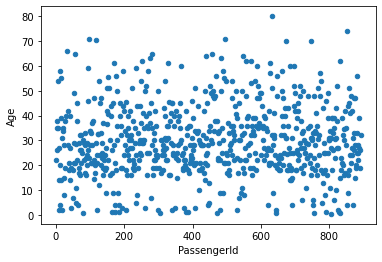

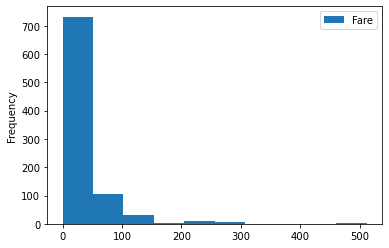

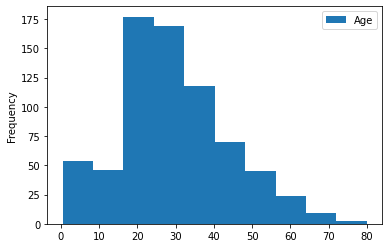

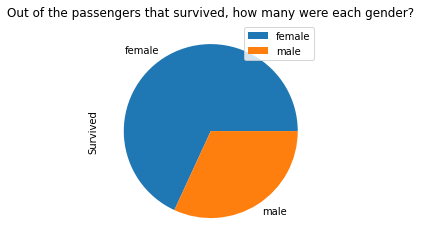

Number of males and females
male      577
female    314
Name: Sex, dtype: int64


In [19]:
#explore the data
#are these missing values? where?
#make graphs showing % of male vs female
#make graph showing age
#make graph showing fare


#python for data analysis pg 160-162 describe()


#make graph from pandas dataframe data https://datatofish.com/plot-dataframe-pandas/

import matplotlib.pyplot as plt
   
#print the names of the columns
train.columns


#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

train.plot(x ='PassengerId', y='Age', kind = 'scatter')
plt.show()

train.plot(x ='Age', y='Fare', kind = 'hist')
plt.show()

train.plot(x ='PassengerId', y='Age', kind = 'hist')
plt.show()


#pie chart
#https://kontext.tech/article/402/pandas-dataframe-plot-pie-chart
#train.plot(y ='Survived', kind = 'pie') #BAD
train.groupby(['Sex']).sum().plot(kind='pie', y='Survived')
plt.title("Out of the passengers that survived, how many were each gender?")
plt.show()



#############make a pie chart showing total % of male vs female
#make a copy of the dataframe
traincopy = train

#add a column of 1s to the copy

#set that to the y when making a pir chart


#################orrr we could count the # of male vs female ppl in that column
#https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column,in%20the%20column%20%E2%80%9Ccondition%E2%80%9D

print("Number of males and females")
print(train['Sex'].value_counts())

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

data = {'Unemployment_Rate': [6.1,5.8,5.7,5.7,5.8,5.6,5.5,5.3,5.2,5.2],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }
  
df = pd.DataFrame(data,columns=['Unemployment_Rate','Stock_Index_Price'])
df.plot(x ='Unemployment_Rate', y='Stock_Index_Price', kind = 'scatter')

In [5]:
#clean the data (remove/replace missing values)
#embarked- get rid of the 2 people with no data
#cabin- get rid of that column
#age-replace with median value

#python for data analysis dealing with missing values pg 195-200, 312

#hands on machine learning pg 63

#how do you know what to do with missing data
#literally uses the titanic dataset as an example
#https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-handling-missing-values/


#print ALL missing values
missing_values=train.isnull().sum()
print(missing_values)


#in_place=True because we want to modify the original dataset
train.dropna(subset=["Embarked"], inplace=True) #drop missing values from embarked column
#train.drop("Cabin", axis=1, inplace=True) #drop Cabin column - we can only run this once
median = train['Age'].median()#calculate the median age
train["Age"].fillna(median, inplace=True) #fill in the median age for all the missing values



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
#format the data further
#we cannot send it string values- so we delete name and ticket columns

#drop all columns that use strings

train.drop("Name", axis=1, inplace=True) #drop Name column - we can only run this once

train.drop("Ticket", axis=1, inplace=True) #drop Ticket column - we can only run this once


print(train)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  28.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [34]:
#format the data further
#we cannot send it string values- so we need to convert "Sex" and "Embarked" to numbers

#pg 204 "Python For Data Analysis" - Replacing Values - replace() function


#1 is female, 0 is male
train["Sex"].replace("female",1, inplace = True)
train["Sex"].replace("male",0, inplace = True)

print(train["Sex"])


print(train["Embarked"].describe()) #there are 3 unique values
print(train["Embarked"]) #the letters are C S and Q
#C is 0, S is 1, Q is 3
#train["Embarked"].replace(["C","S","Q"],[1,1,3], inplace = True)#replace everything in 1 line of code #run ONCE

print(train["Embarked"]) #show that we have replaced the letters with numbers

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 889, dtype: int64
count    889.000000
mean       1.173228
std        0.562854
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Embarked, dtype: float64
0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    3
Name: Embarked, Length: 889, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    3
Name: Embarked, Length: 889, dtype: int64


In [ ]:
##################messing around with fixing Age data - this code does NOT need to run

print("\nWhich Age values are null?")
print(train["Age"].isnull())
print(train["Age"].isnull().value_counts())


#fix the age column by filling null values with median age

#calculcate the meam
print("mean value of Age is", train["Age"].mean())

#create a new version of the age column that has the missing value filled in
trainAgeNoNull = train["Age"].fillna(29.7)


print("\n\nWhich Age values are null after fixing it?")
print(trainAgeNoNull.isnull())
print(trainAgeNoNull.isnull().value_counts())


#########next step would be to replace the series in the dataframe with the new, fixed, age one.


In [35]:
#Format the data so that we can send it it in to the model
#maybe put it in a dataframe?

train_y_answers = train["Survived"]

train_x = train.drop("Survived", axis=1) 

print("train_y_answers is",train_y_answers)
print("train_x is",train_x)


#print ALL missing values in train_x
missing_values=train_x.isnull().sum()
print(missing_values)

#we will need to seperate the data into x and y

train_y_answers is 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64
train_x is      PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.0      1      0   7.2500         1
1              2       1    1  38.0      1      0  71.2833         1
2              3       3    1  26.0      0      0   7.9250         1
3              4       1    1  35.0      1      0  53.1000         1
4              5       3    0  35.0      0      0   8.0500         1
..           ...     ...  ...   ...    ...    ...      ...       ...
886          887       2    0  27.0      0      0  13.0000         1
887          888       1    1  19.0      0      0  30.0000         1
888          889       3    1  28.0      1      2  23.4500         1
889          890       1    0  26.0      0      0  30.0000         1
890          891       3    0  32.0      0      0   7.7500         3



In [36]:
#seperate the data into train and validation set 
#(test set is already set aside)

from sklearn.model_selection import train_test_split
#train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y_answers, test_size=0.2, random_state=42)

print("X train:",X_train.describe())
print("X test:",X_test.describe())
print("y train:",y_train.describe())
print("y test:",y_test.describe())

X train:        PassengerId      Pclass         Sex         Age       SibSp  \
count   711.000000  711.000000  711.000000  711.000000  711.000000   
mean    446.922644    2.322082    0.336146   29.511730    0.554149   
std     256.635124    0.835180    0.472722   13.144679    1.168643   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     225.500000    2.000000    0.000000   22.000000    0.000000   
50%     451.000000    3.000000    0.000000   28.000000    0.000000   
75%     672.500000    3.000000    1.000000   36.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  711.000000  711.000000  711.000000  
mean     0.382560   32.060354    1.182841  
std      0.804865   49.195227    0.576818  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.500000    1.000000  
75%      0.000000   30.695800    1.000000  
max     

In [37]:
#create the model
#pg 176 Hands on Machine Learning chapt 8:decision trees
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth= 5)


In [38]:
#train the model by sending it the training data 
tree_clf.fit(X_train,y_train)

#cannot deal with string data

DecisionTreeClassifier(max_depth=5)

In [ ]:
#test the model on the validation set- find the accuracy


In [ ]:
#make a .csv file with our answers for the test data
#we will send it in to the Kaggle competition.
#will be scored by the Kaggle website
#For example, a score of 0.7 in this competition indicates 
#you predicted Titanic survival correctly for 70% of people.